# []

In [1]:
# inbuilt 
import os
import sys
import math

# most common
import numpy as np
import matplotlib.pyplot as plt

# pytorch
import torch as tt
import torch.nn as nn
import torch.optim as oo
import torch.functional as ff
import torch.distributions as dd
import torch.utils.data as ud

# custom
import known
from known.basic import pj
from known.basic.common import Verbose as verb
import known.ktorch as kt

print(f'{sys.version=}\n{np.__version__=}\n{tt.__version__=}\n{known.__version__=}')

sys.version='3.8.10 (tags/v3.8.10:3d8993a, May  3 2021, 11:48:03) [MSC v.1928 64 bit (AMD64)]'
np.__version__='1.22.2'
tt.__version__='1.10.1+cu102'
known.__version__='0.0.1'


# Select DataSet

## (1) Sinus

In [2]:
seqlen = 10
cols = ('1','2', '3')
input_size = len(cols)

ds_test  = kt.SeqDataset.from_csv(pj('data_rnn/sinu.csv'), cols=cols, 
                seqlen=seqlen, reverse=True, normalize=False, squeeze_label=True, dtype=tt.float32)
ds_train = kt.SeqDataset.from_csv(pj('data_rnn/sinu_train.csv'), cols=cols, 
                seqlen=seqlen, reverse=True, normalize=False, squeeze_label=True, dtype=tt.float32)
ds_val = kt.SeqDataset.from_csv(pj('data_rnn/sinu_test.csv'), cols=cols, 
                seqlen=seqlen, reverse=True, normalize=False, squeeze_label=True, dtype=tt.float32)

ds_train, ds_val, ds_test

(<known.ktorch.data.SeqDataset at 0x167e4a78100>,
 <known.ktorch.data.SeqDataset at 0x167e9096190>)

# (2) custom - g

In [3]:
seqlen = 25
cols = ('1','2')
input_size = len(cols)

ds_test  = kt.SeqDataset.from_csv(pj('data_rnn/g.csv'), cols=cols, 
                seqlen=seqlen, reverse=True, normalize=True, squeeze_label=True, dtype=tt.float32)
ds_train = kt.SeqDataset.from_csv(pj('data_rnn/g_train.csv'), cols=cols, 
                seqlen=seqlen, reverse=True, normalize=True, squeeze_label=True, dtype=tt.float32)
ds_val = kt.SeqDataset.from_csv(pj('data_rnn/g_test.csv'), cols=cols, 
                seqlen=seqlen, reverse=True, normalize=True, squeeze_label=True, dtype=tt.float32)

ds_train, ds_val, ds_test

(<known.ktorch.data.SeqDataset at 0x167892b47f0>,
 <known.ktorch.data.SeqDataset at 0x167e90a4400>)

# (3) custom - h

In [4]:
seqlen = 40
cols = ('1','2')
input_size = len(cols)

ds_test  = kt.SeqDataset.from_csv(pj('data_rnn/h.csv'), cols=cols, 
                seqlen=seqlen, reverse=True, normalize=True, squeeze_label=True, dtype=tt.float32)
ds_train = kt.SeqDataset.from_csv(pj('data_rnn/h_train.csv'), cols=cols, 
                seqlen=seqlen, reverse=True, normalize=True, squeeze_label=True, dtype=tt.float32)
ds_val = kt.SeqDataset.from_csv(pj('data_rnn/h_test.csv'), cols=cols, 
                seqlen=seqlen, reverse=True, normalize=True, squeeze_label=True, dtype=tt.float32)

ds_train, ds_val, ds_test

(<known.ktorch.data.SeqDataset at 0x167e9089b50>,
 <known.ktorch.data.SeqDataset at 0x1678f149d60>)

# Define Regression Network

In [5]:
dt = tt.float32
dropout=0.0
batch_first = True
num_layers = 2
hidden_size = 32
bidirectional = True
bias = True


hidden_sizes = [hidden_size for _ in range(num_layers)]
stack_output=True


## encapsulate rnns

In [6]:
networks = dict(


elman_kt = kt.RegressionRNN(kt.ELMAN(
        input_size=input_size,      
        i2h_sizes=hidden_sizes,      
        i2o_sizes=None,  
        o2o_sizes=None,  
        dropout=0.0,        
        batch_first=batch_first,  
        stack_output=stack_output, 
        i2h_bias = bias, 
        i2o_bias = True,
        o2o_bias = True,
        i2h_activations=(),
        i2o_activation=None,
        o2o_activation=None,
        last_activation=None,
        hypers=None,
        dtype=dt,
        device=None),
    bidir = bidirectional),

gru_kt = kt.RegressionRNN(kt.GRU(
        input_size=input_size,      
        i2h_sizes=hidden_sizes,      
        i2o_sizes=None,  
        o2o_sizes=None,  
        dropout=0.0,        
        batch_first=batch_first,  
        stack_output=stack_output, 
        i2h_bias = bias, 
        i2o_bias = True,
        o2o_bias = True,
        i2h_activations=(),
        i2o_activation=None,
        o2o_activation=None,
        last_activation=None,
        hypers=None,
        dtype=dt,
        device=None),
    bidir = bidirectional),

lstm_kt = kt.RegressionRNN(kt.LSTM(
        input_size=input_size,      
        i2h_sizes=hidden_sizes,      
        i2o_sizes=None,  
        o2o_sizes=None,  
        dropout=0.0,        
        batch_first=batch_first,  
        stack_output=stack_output, 
        i2h_bias = bias, 
        i2o_bias = True,
        o2o_bias = True,
        i2h_activations=(),
        i2o_activation=None,
        o2o_activation=None,
        last_activation=None,
        hypers=None,
        dtype=dt,
        device=None),
    bidir = bidirectional),

mgu_kt = kt.RegressionRNN(kt.MGU(
        input_size=input_size,      
        i2h_sizes=hidden_sizes,      
        i2o_sizes=None,  
        o2o_sizes=None,  
        dropout=0.0,        
        batch_first=batch_first,  
        stack_output=stack_output, 
        i2h_bias = bias, 
        i2o_bias = True,
        o2o_bias = True,
        i2h_activations=(),
        i2o_activation=None,
        o2o_activation=None,
        last_activation=None,
        hypers=None,
        dtype=dt,
        device=None),
    bidir = bidirectional),

janet_kt = kt.RegressionRNN(kt.JANET(
        input_size=input_size,      
        i2h_sizes=hidden_sizes,      
        i2o_sizes=None,  
        o2o_sizes=None,  
        dropout=0.0,        
        batch_first=batch_first,  
        stack_output=stack_output, 
        i2h_bias = bias, 
        i2o_bias = True,
        o2o_bias = True,
        i2h_activations=(),
        i2o_activation=None,
        o2o_activation=None,
        last_activation=None,
        hypers=None,
        dtype=dt,
        device=None),
    bidir = bidirectional),

)

colors = {k:v for k,v in zip(networks.keys(), \
            [ 'tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown' ])}

# (A) Train and Evaluate

elman_kt <class 'known.ktorch.rnn.RegressionRNN'>
Training samples: [310]
Training batches: [10]
Validation samples: [110]
Validation batches: [1]
Start Training @ 2023-01-24 03:39:24.142422
-------------------------------------------
[*] Saved@ elman_kt.reg
-------------------------------------------
Final Training Loss: [3.0109574527159567e-05]
Final Validation Loss: [5.92733958910685e-05]
End Training @ 2023-01-24 03:40:50.233534, Elapsed Time: [0:01:26.091112]


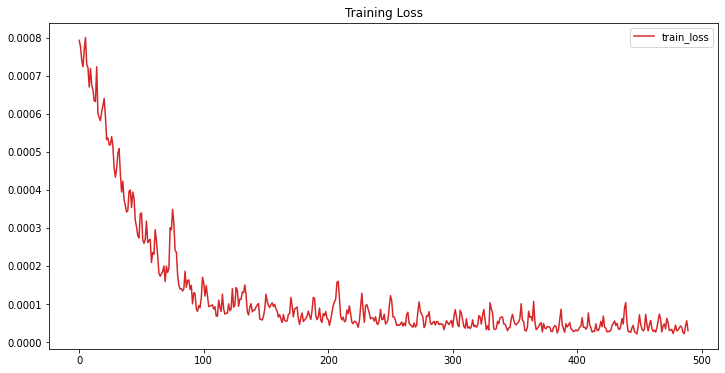

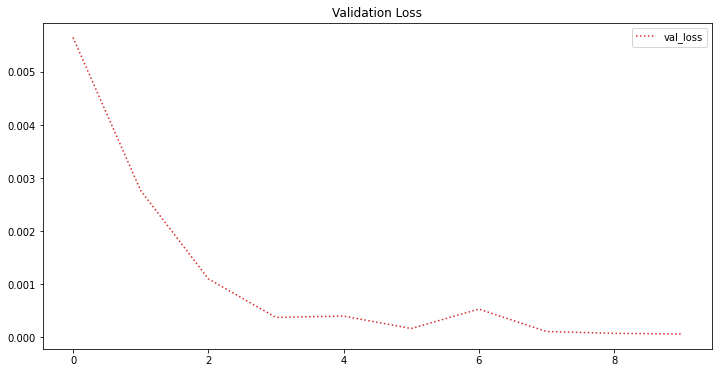

Testing samples: [460]
Testing batches: [1]
Testing Loss: 0.0001342167379334569
gru_kt <class 'known.ktorch.rnn.RegressionRNN'>
Training samples: [310]
Training batches: [10]
Validation samples: [110]
Validation batches: [1]
Start Training @ 2023-01-24 03:40:50.445540
-------------------------------------------
[*] Saved@ gru_kt.reg
-------------------------------------------
Final Training Loss: [2.292216286150506e-05]
Final Validation Loss: [0.0001798654702724889]
End Training @ 2023-01-24 03:45:57.912973, Elapsed Time: [0:05:07.467433]


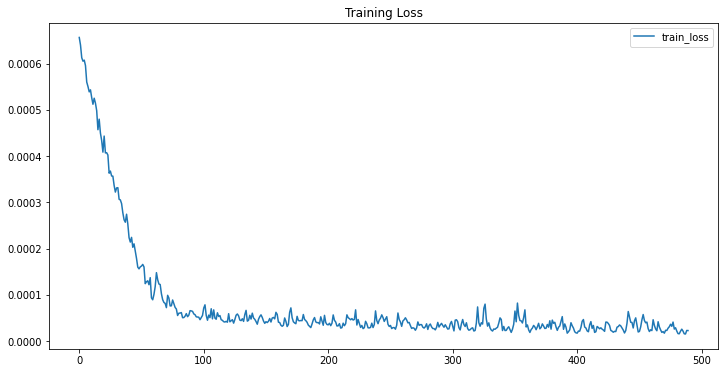

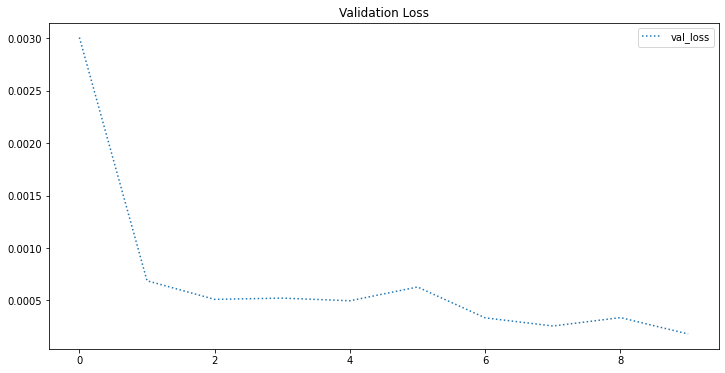

Testing samples: [460]
Testing batches: [1]
Testing Loss: 0.0004759417206514627
lstm_kt <class 'known.ktorch.rnn.RegressionRNN'>
Training samples: [310]
Training batches: [10]
Validation samples: [110]
Validation batches: [1]
Start Training @ 2023-01-24 03:45:58.147973
-------------------------------------------
[*] Saved@ lstm_kt.reg
-------------------------------------------
Final Training Loss: [4.24217931140447e-05]
Final Validation Loss: [0.001274197711609304]
End Training @ 2023-01-24 03:51:39.828050, Elapsed Time: [0:05:41.680077]


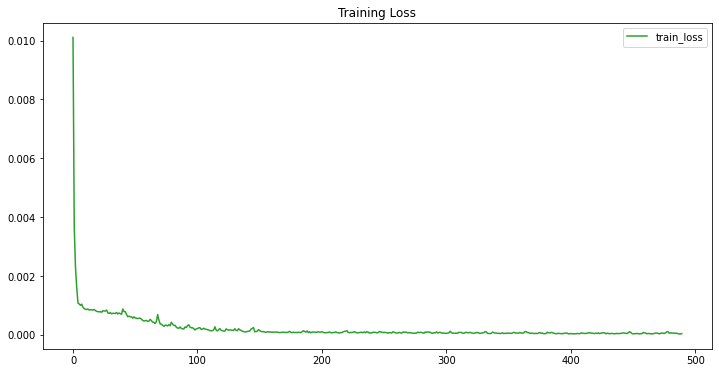

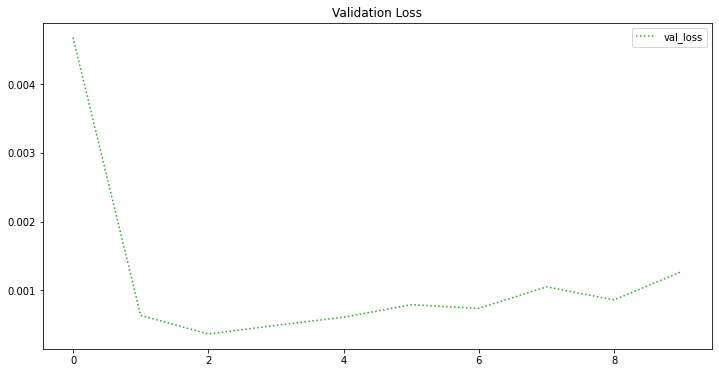

Testing samples: [460]
Testing batches: [1]
Testing Loss: 0.00038152156048454344
mgu_kt <class 'known.ktorch.rnn.RegressionRNN'>
Training samples: [310]
Training batches: [10]
Validation samples: [110]
Validation batches: [1]
Start Training @ 2023-01-24 03:51:40.070050
-------------------------------------------
[*] Saved@ mgu_kt.reg
-------------------------------------------
Final Training Loss: [7.743797432340216e-05]
Final Validation Loss: [7.883059879532084e-05]
End Training @ 2023-01-24 03:55:41.794597, Elapsed Time: [0:04:01.724547]


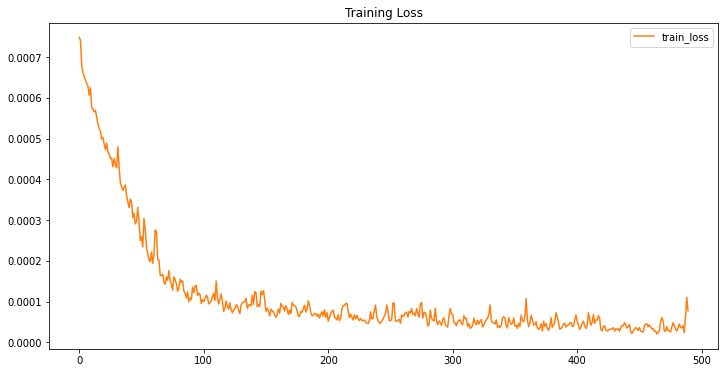

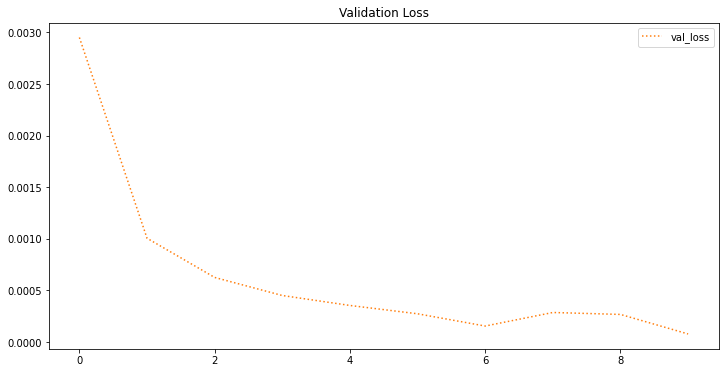

Testing samples: [460]
Testing batches: [1]
Testing Loss: 0.0003627491241786629
janet_kt <class 'known.ktorch.rnn.RegressionRNN'>
Training samples: [310]
Training batches: [10]
Validation samples: [110]
Validation batches: [1]
Start Training @ 2023-01-24 03:55:42.022465
-------------------------------------------
[*] Saved@ janet_kt.reg
-------------------------------------------
Final Training Loss: [8.423129074799362e-05]
Final Validation Loss: [0.0010591748869046569]
End Training @ 2023-01-24 03:59:52.359534, Elapsed Time: [0:04:10.337069]


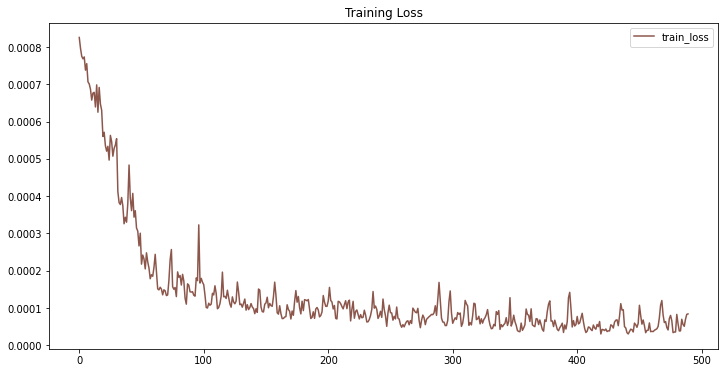

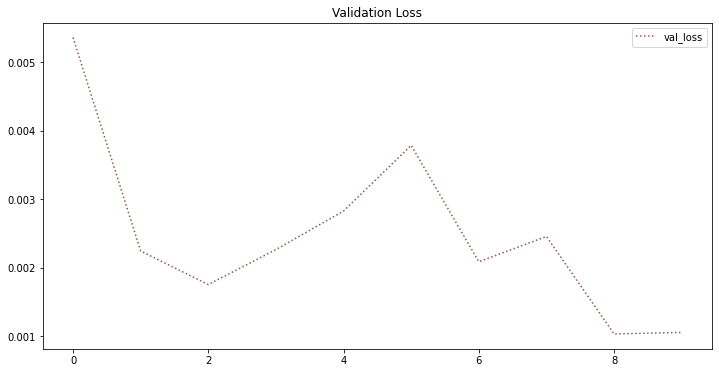

Testing samples: [460]
Testing batches: [1]
Testing Loss: 0.0004933499731123447


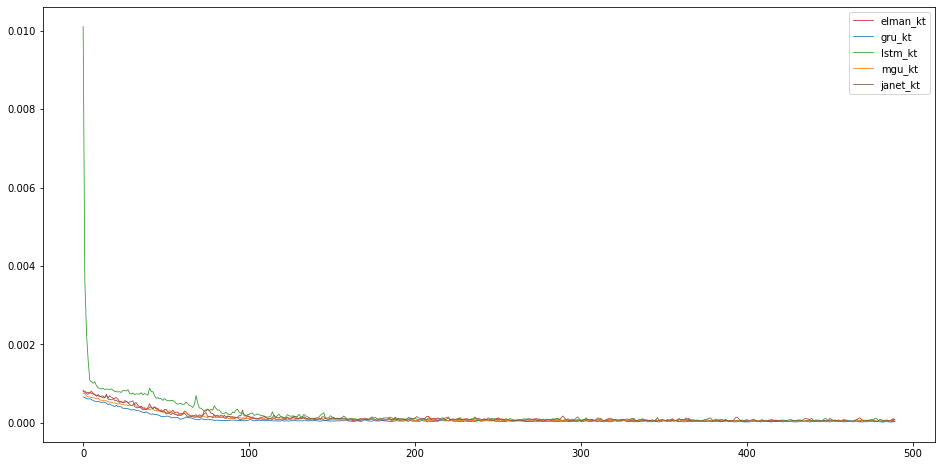

In [7]:
test_loss, train_loss = {}, {}
for key,model in networks.items():
    print(key, model.__class__)
    epochs = 500
    batch_size=32
    shuffle=True
    validation_freq = int(epochs/10)
    criterion=nn.MSELoss()
    lr = 0.0025
    weight_decay = 0.0
    optimizer=oo.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    lrs=oo.lr_scheduler.LinearLR(optimizer, start_factor= 1.0, end_factor=0.7, total_iters=epochs)

    early_stop_train=kt.QuantiyMonitor('TrainLoss', patience=50, delta=0.00001)
    early_stop_val=kt.QuantiyMonitor('ValLoss', patience=50, delta=0.00001)
    #checkpoint_freq=int(epochs/4)
    save_path=f'{key}.reg'
    loss_plot_start = int(epochs/50)

    trainer = kt.Trainer(model)
    trainer.optimizer=optimizer
    trainer.criterion=criterion

    trainer.fit(training_data=ds_train, validation_data=ds_val, 
                epochs=epochs, batch_size=batch_size,shuffle=shuffle,validation_freq=validation_freq,
                save_path=save_path, verbose=1)

    trainer.plot_results(color=colors[key],loss_plot_start=loss_plot_start)

    mtl, _ = trainer.evaluate(ds_test, batch_size=None)
    train_loss[key] = np.array(trainer.train_loss_history)
    test_loss[key] = mtl
    print('=================================================')
    
plt.figure(figsize=(16,8))
for k,v in train_loss.items():
    plt.plot(np.mean(v, axis=1)[loss_plot_start:], label=k, color=colors[k], linewidth=0.8)
plt.legend()
plt.show()

# (B) Load and Evaluate

In [8]:
for key,model in networks.items():
    kt.load_state(model, f'{key}.reg')
test_loss={}

for key,model in networks.items():
    trainer = kt.Trainer(model)
    trainer.criterion=nn.MSELoss() 
    mtl, tl = trainer.evaluate(ds_test)

    test_loss[key] = mtl

Testing samples: [460]
Testing batches: [1]
Testing Loss: 0.0001342167379334569
Testing samples: [460]
Testing batches: [1]
Testing Loss: 0.0004759417206514627
Testing samples: [460]
Testing batches: [1]
Testing Loss: 0.00038152156048454344
Testing samples: [460]
Testing batches: [1]
Testing Loss: 0.0003627491241786629
Testing samples: [460]
Testing batches: [1]
Testing Loss: 0.0004933499731123447


# Plot Evaluation Results

elman_kt:	0.0001342167379334569
gru_kt:	0.0004759417206514627
lstm_kt:	0.00038152156048454344
mgu_kt:	0.0003627491241786629
janet_kt:	0.0004933499731123447


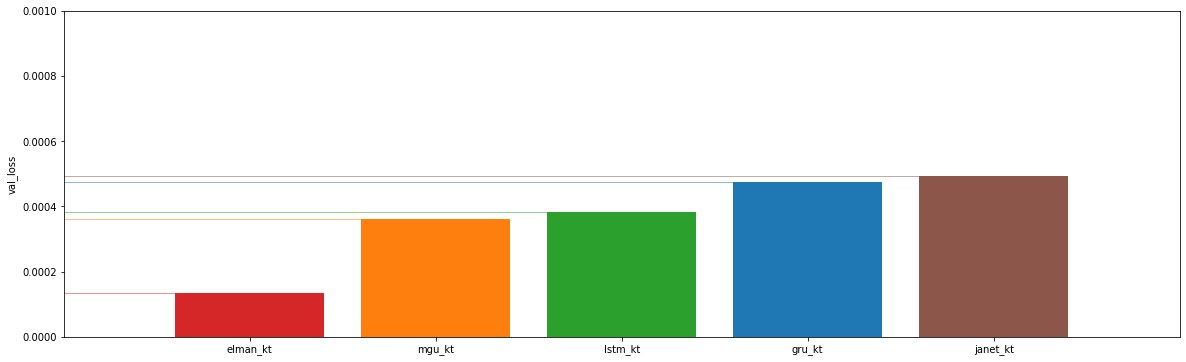

In [9]:
y = []
l = []
c = []
for k,v in test_loss.items():
    print(f'{k}:\t{v}')
    y.append(v)
    l.append(k)
    c.append(colors[k])

x= range(len(test_loss))

y = np.array(y)
l = np.array(l)
t = np.argsort(y)

plt.figure(figsize=(20,6))
plt.xlim(-1,len(x))
plt.ylim(0,0.001)
for i in t:
    plt.bar([i] , y[t[i]], color=c[t[i]] )
    plt.hlines(y[t[i]], -1, i, linestyles='solid', linewidth=0.5, color=c[t[i]])
plt.xticks(x, l[t])
plt.ylabel('val_loss')
plt.show()

# Manual Testing

## test dataset

In [10]:
res = {}
for key,model in networks.items():
    print(key, model.__class__)
    model.eval()
    with tt.no_grad():
        dl = iter(ds_test.dataloader(batch_size=int(len(ds_test)*1.0)))
        Xv, Yv = next(dl)
        Pv = model(Xv)
        res[key]=Pv #print(Xv.shape, Yv.shape, Pv.shape)



elman_kt <class 'known.ktorch.rnn.RegressionRNN'>
gru_kt <class 'known.ktorch.rnn.RegressionRNN'>
lstm_kt <class 'known.ktorch.rnn.RegressionRNN'>
mgu_kt <class 'known.ktorch.rnn.RegressionRNN'>
janet_kt <class 'known.ktorch.rnn.RegressionRNN'>


## visualize

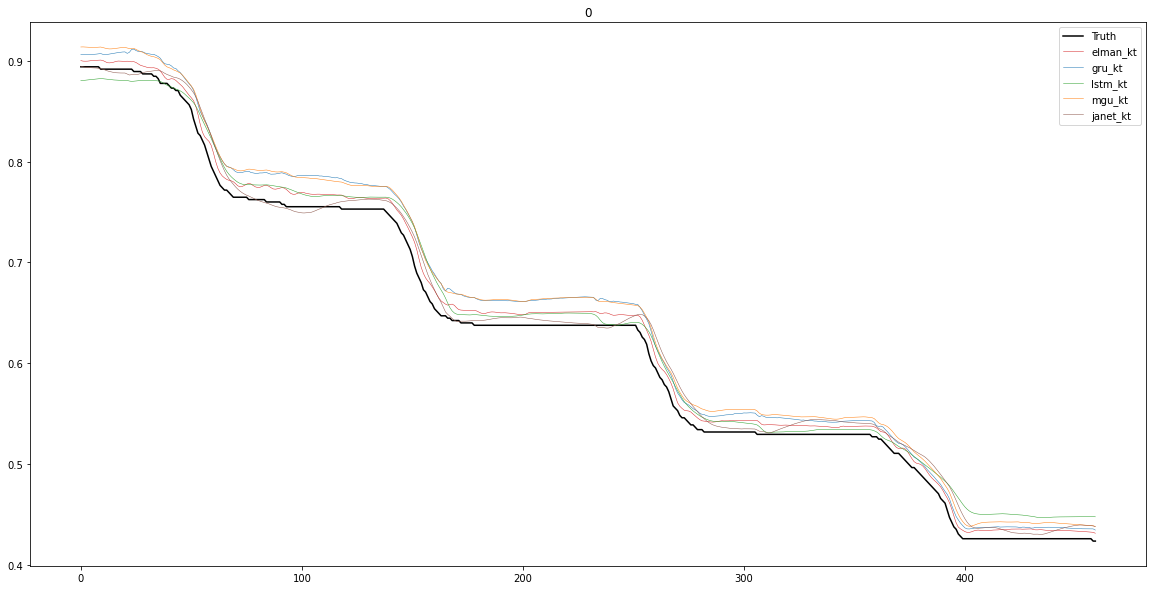

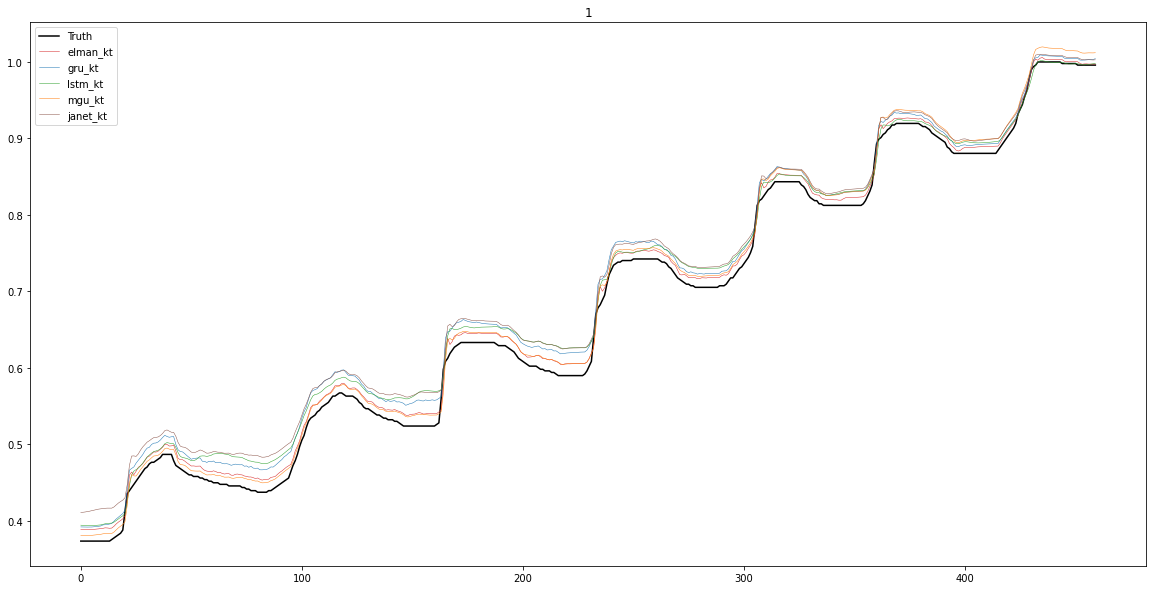

In [11]:
for i in range(input_size):
    plt.figure(figsize=(20,10))
    plt.title(f'{i}')
    
    plt.plot(Yv[:,i], color='black', label='Truth')
    for key,r in res.items():
        plt.plot(r[:,i], color=colors[key], label=f'{key}', linewidth=0.5)
    plt.legend()
    plt.show()
    plt.close()
    print('=================================================')